## TFM

### DATASETS

In [ ]:
# [datasets]  https://data.mendeley.com/datasets/jxwvdwhpc2/1


## EDA DEL DATASETS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks"

'A2 (1).ipynb'		     M8.ipynb
 A2.ipynb		     M9_A1.ipynb
 A2_MN.ipynb		     M9_A2.ipynb
 A3.ipynb		     M9_A3.ipynb
 Actividad1.ipynb	     report
 clasificacion		     señales
'clasificacion binaria'      skin-cancer-malignant-vs-benign
'clasificacion multiclase'   TFM_EDA.ipynb
'Copia de M6_A2.ipynb'	     tfm.ipynb
 flood-area-segmentation     yolov8n_señales.pt


### 1. 🧐 Análisis Exploratorio de Datos (EDA)
Objetivo: Conocer y entender el dataset de imágenes.
- Cargar el dataset: comprobar número de imágenes por clase, tamaño, formato.
- Visualizar muestras por clase (benignas, malignas, tipos específicos).
- Verificar si el dataset está balanceado.
- Comprobar metadatos (resolución, color/grises, nombres de archivos, etiquetas).
- Estadísticas básicas: dimensiones, distribución de clases, valores de píxeles.
- Analizar la fuente de datos: ¿mamografías, histología, ultrasonido?

In [ ]:
import os
import pandas as pd

# Ruta base
base_path = "/content/drive/My Drive/Colab Notebooks/clasificacion multiclase"

image_paths = []
labels = []
class_names = []
magnifications = []

# Obtener todas las clases para el mapeo
group_classes = []
for group in os.listdir(base_path):
    group_path = os.path.join(base_path, group)
    if not os.path.isdir(group_path):
        continue
    for class_name in os.listdir(group_path):
        class_path = os.path.join(group_path, class_name)
        if os.path.isdir(class_path):
            group_classes.append(class_name)

group_classes = sorted(set(group_classes))
class_map = {name: i for i, name in enumerate(group_classes)}

# Recorrer imágenes y asignar etiquetas numéricas y magnificación
for group in os.listdir(base_path):
    group_path = os.path.join(base_path, group)
    if not os.path.isdir(group_path):
        continue
    for class_name in os.listdir(group_path):
        class_path = os.path.join(group_path, class_name)
        if not os.path.isdir(class_path):
            continue

        class_images = [
            os.path.join(class_path, img)
            for img in os.listdir(class_path)
            if img.lower().endswith(('.jpg', '.jpeg', '.png'))
        ]

        image_paths.extend(class_images)
        labels.extend([class_map[class_name]] * len(class_images))
        class_names.extend([class_name] * len(class_images))
        magnifications.extend([group] * len(class_images))

# Número total de clases
num_clases = len(group_classes)

# Crear DataFrame
info_df = pd.DataFrame({
    'ruta_imagen': image_paths,
    'clase': labels,
    'clase_name': class_names,
    'magnification': magnifications
})

# Mostrar resultados
print(f"\nNúmero total de clases: {num_clases}")
print("\nCantidad por clase_name:")
print(info_df['clase_name'].value_counts())

print("\nCantidad por (clase, clase_name):")
print(info_df.groupby(['clase', 'clase_name']).size())

print("\nCantidad por magnificación:")
print(info_df['magnification'].value_counts())



Número total de clases: 8

Cantidad por clase_name:
clase_name
ductal_carcinoma       3460
fibroadenoma           1014
mucinous_carcinoma      792
lobular_carcinoma       626
tubular_adenoma         569
papillary_carcinoma     560
phyllodes_tumor         453
adenosis                444
Name: count, dtype: int64

Cantidad por (clase, clase_name):
clase  clase_name         
0      adenosis                444
1      ductal_carcinoma       3460
2      fibroadenoma           1014
3      lobular_carcinoma       626
4      mucinous_carcinoma      792
5      papillary_carcinoma     560
6      phyllodes_tumor         453
7      tubular_adenoma         569
dtype: int64

Cantidad por magnificación:
magnification
100X    2081
200X    2013
40X     1995
400X    1829
Name: count, dtype: int64


In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

n_cols = 4
class_names = list(class_counts.keys())
n_rows = len(class_names) // n_cols + 1
plt.figure(figsize=(n_cols * 3, n_rows * 3))

for idx, class_name in enumerate(class_names):
    class_dir = None
    for group in os.listdir(base_path):
        group_path = os.path.join(base_path, group)
        if not os.path.isdir(group_path):
            continue
        possible_path = os.path.join(group_path, class_name)
        if os.path.isdir(possible_path):
            class_dir = possible_path
            break

    if class_dir is None:
        print(f"No se encontró carpeta para la clase {class_name}")
        continue

    # Elegir imagen aleatoria
    images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if not images:
        print(f"No hay imágenes en la carpeta {class_dir}")
        continue

    image_file = random.choice(images)
    image_path = os.path.join(class_dir, image_file)
    image = Image.open(image_path)

    plt.subplot(n_rows, n_cols, idx + 1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')

plt.suptitle("Ejemplos de imágenes por clase")
plt.tight_layout()
plt.show()


NameError: name 'class_counts' is not defined

In [ ]:
info_df['clase_name'].value_counts()


,count
clase_name,
ductal_carcinoma,3460
fibroadenoma,1014
mucinous_carcinoma,792
lobular_carcinoma,626
tubular_adenoma,569
papillary_carcinoma,560
phyllodes_tumor,453
adenosis,444


In [ ]:

info_df['magnification'].value_counts()

,count
magnification,
100X,2081
200X,2013
40X,1995
400X,1829


In [ ]:
import numpy as np
import pandas as pd
import cv2
from skimage.feature import hog, local_binary_pattern, graycomatrix, graycoprops
from skimage.measure import shannon_entropy
from skimage.color import rgb2gray
from skimage.filters import gabor
from skimage.measure import shannon_entropy
from PIL import Image
from tqdm import tqdm

def extract_features(image_path):
    features = {}

    # Abrir imagen con PIL y redimensionar
    img = Image.open(image_path).resize((128, 128))
    img_np = np.array(img)

    # Verificar que sea RGB
    if len(img_np.shape) != 3 or img_np.shape[2] != 3:
        raise ValueError(f"La imagen {image_path} no es RGB válida.")

    # ----- Color promedio -----
    features['mean_R'] = img_np[:, :, 0].mean()
    features['mean_G'] = img_np[:, :, 1].mean()
    features['mean_B'] = img_np[:, :, 2].mean()

    # ----- Escala de grises -----
    gray = rgb2gray(img_np)
    gray_uint8 = (gray * 255).astype('uint8')

    features['gray_mean'] = gray.mean()

    # ----- GLCM contraste -----
    glcm = graycomatrix(gray_uint8,
                        distances=[1],
                        angles=[0],
                        levels=256,
                        symmetric=True,
                        normed=True)
    features['GLCM_contrast'] = graycoprops(glcm, 'contrast')[0, 0]

    # ----- Entropía -----
    features['entropy'] = shannon_entropy(gray_uint8)

    return features

In [ ]:
from tqdm import tqdm
import pandas as pd

clase_a_indice = {clase: idx for idx, clase in enumerate(sorted(info_df['clase_name'].unique()))}

features = []
labels = []

for image_path, clase in tqdm(zip(info_df['ruta_imagen'], info_df['clase_name']),
                              desc="Extrayendo características", total=len(info_df)):
    try:
        f_dict = extract_features(image_path)
        features.append(f_dict)
        labels.append(clase_a_indice[clase])
    except Exception as e:
        print(f"Error en {image_path}: {e}")

features_df = pd.DataFrame(features)
labels_series = pd.Series(labels, name='label')

# Concatenar con info_df
df = pd.concat([info_df, features_df, labels_series], axis=1)
print(df.describe())


Extrayendo características: 100%|██████████| 7918/7918 [47:56<00:00,  2.75it/s]

             clase       mean_R       mean_G       mean_B    gray_mean  \
count  7918.000000  7918.000000  7918.000000  7918.000000  7918.000000   
mean      2.530311   200.525908   159.476785   194.751801     0.669581   
std       2.051387    17.040491    27.372586    16.190518     0.082695   
min       0.000000   120.003479    49.176392   122.711365     0.290806   
25%       1.000000   188.877380   142.304108   184.641739     0.618987   
50%       2.000000   200.387390   163.393188   194.358002     0.678663   
75%       4.000000   211.125595   178.081680   204.869339     0.721310   
max       7.000000   251.309082   236.063477   248.451721     0.926423   

       GLCM_contrast      entropy        label  
count    7918.000000  7918.000000  7918.000000  
mean      437.767353     6.613932     2.530311  
std       287.160198     0.459571     2.051387  
min        14.668000     4.284059     0.000000  
25%       224.727854     6.322680     1.000000  
50%       367.060285     6.657065     2

In [ ]:
df.head()

,ruta_imagen,clase,clase_name,magnification,mean_R,mean_G,mean_B,gray_mean,GLCM_contrast,entropy,label
0,/content/drive/My Drive/Colab Notebooks/clasif...,7,tubular_adenoma,40X,182.984619,152.798706,187.167419,0.634083,508.315945,6.593823,7
1,/content/drive/My Drive/Colab Notebooks/clasif...,7,tubular_adenoma,40X,203.182617,199.341248,199.871338,0.785081,1303.174213,6.837036,7
2,/content/drive/My Drive/Colab Notebooks/clasif...,7,tubular_adenoma,40X,211.604858,194.572449,204.554565,0.780045,503.377461,6.519570,7
3,/content/drive/My Drive/Colab Notebooks/clasif...,7,tubular_adenoma,40X,216.638611,197.529358,215.094360,0.795516,276.420829,6.373751,7
4,/content/drive/My Drive/Colab Notebooks/clasif...,7,tubular_adenoma,40X,200.291809,168.535828,200.873413,0.696531,535.553088,6.793782,7


/tmp/ipython-input-3582663126.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='clase_name', y='mean_R', palette=custom_palette)


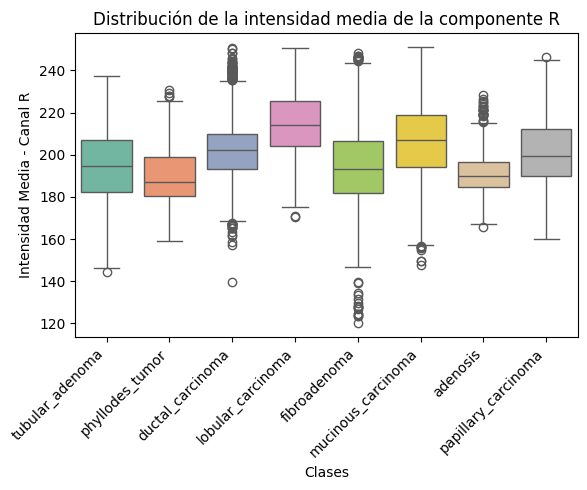

In [ ]:
# Crear una paleta automática según el número de clases únicas
clases_unicas = df['clase_name'].unique()
paleta_colores = sns.color_palette("Set2", len(clases_unicas))
custom_palette = dict(zip(clases_unicas, paleta_colores))

# Boxplot con etiquetas y título informativo
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='clase_name', y='mean_R', palette=custom_palette)
plt.title("Distribución de la intensidad media de la componente R")
plt.ylabel("Intensidad Media - Canal R")
plt.xlabel("Clases")
plt.xticks(rotation=45, ha='right')  # rotar para nombres largos
plt.tight_layout()
plt.show()


/tmp/ipython-input-1457506815.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='clase_name', y='mean_G', palette=custom_palette)


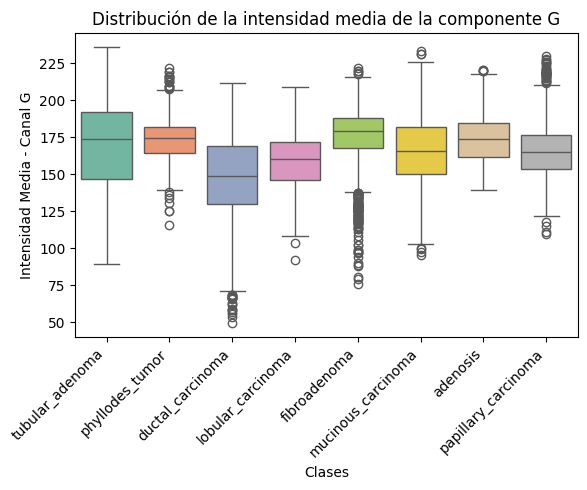

In [ ]:

# Crear una paleta automática según el número de clases únicas
clases_unicas = df['clase_name'].unique()
paleta_colores = sns.color_palette("Set2", len(clases_unicas))
custom_palette = dict(zip(clases_unicas, paleta_colores))

# Boxplot con etiquetas y título informativo
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='clase_name', y='mean_G', palette=custom_palette)
plt.title("Distribución de la intensidad media de la componente G")
plt.ylabel("Intensidad Media - Canal G")
plt.xlabel("Clases")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



/tmp/ipython-input-3889633994.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='clase_name', y='mean_B',  palette=custom_palette)


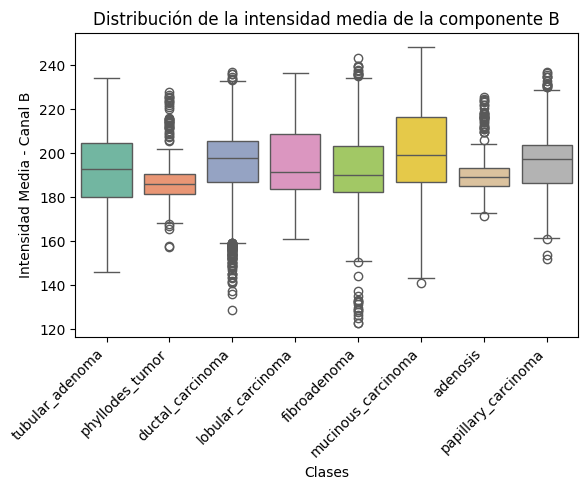

In [ ]:
# Crear una paleta automática según el número de clases únicas
clases_unicas = df['clase_name'].unique()
paleta_colores = sns.color_palette("Set2", len(clases_unicas))
custom_palette = dict(zip(clases_unicas, paleta_colores))

# Boxplot con etiquetas y título informativo
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='clase_name', y='mean_B',  palette=custom_palette)
plt.title("Distribución de la intensidad media de la componente B")
plt.ylabel("Intensidad Media - Canal B")
plt.xlabel("Clases")
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



/tmp/ipython-input-456468370.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='clase_name', y='GLCM_contrast',  palette=custom_palette)


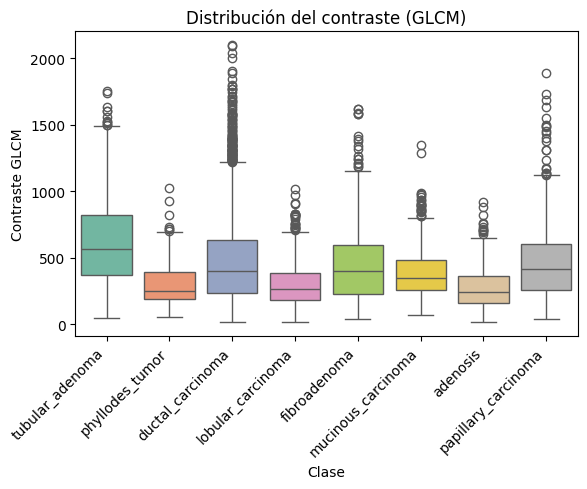

In [ ]:
# Crear una paleta automática según el número de clases únicas
clases_unicas = df['clase_name'].unique()
paleta_colores = sns.color_palette("Set2", len(clases_unicas))
custom_palette = dict(zip(clases_unicas, paleta_colores))

# Boxplot con etiquetas y título informativo
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='clase_name', y='GLCM_contrast',  palette=custom_palette)
plt.title("Distribución del contraste (GLCM)")
plt.ylabel("Contraste GLCM")
plt.xlabel("Clase")
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-65760800.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='clase_name', y='entropy', palette=custom_palette)


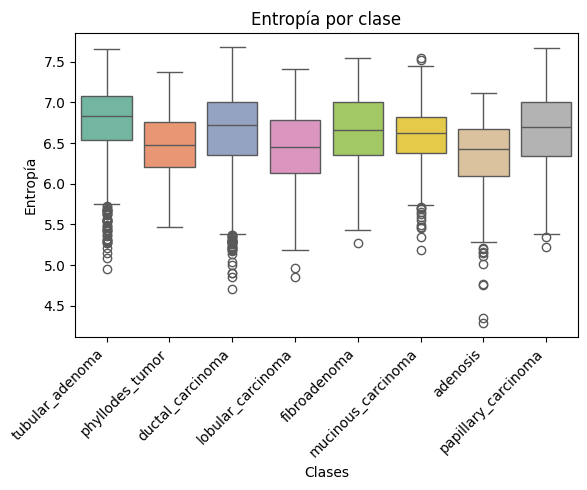

In [ ]:
# Crear una paleta automática según el número de clases únicas
clases_unicas = df['clase_name'].unique()
paleta_colores = sns.color_palette("Set2", len(clases_unicas))
custom_palette = dict(zip(clases_unicas, paleta_colores))

# Boxplot con etiquetas y título informativo
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='clase_name', y='entropy', palette=custom_palette)
plt.title("Entropía por clase")
plt.ylabel("Entropía")
plt.xlabel("Clases")
plt.xticks(rotation=45, ha='right')  # rotar para nombres largos
plt.tight_layout()
plt.show()



In [ ]:
# # Crear una paleta automática según el número de clases únicas
# clases_unicas = df['clase_name'].unique()
# paleta_colores = sns.color_palette("Set2", len(clases_unicas))
# custom_palette = dict(zip(clases_unicas, paleta_colores))

# # Boxplot con etiquetas y título informativo
# plt.figure(figsize=(6,5))
# sns.boxplot(data=df, x='clase_name', y='mean_intensity', palette=custom_palette)
# plt.title("Distribución de la intensidad media por")
# plt.ylabel("Intensidad Media")
# plt.xlabel("Clases")
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()



/tmp/ipython-input-3265162525.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='clase_name', data=df, palette=custom_palette)


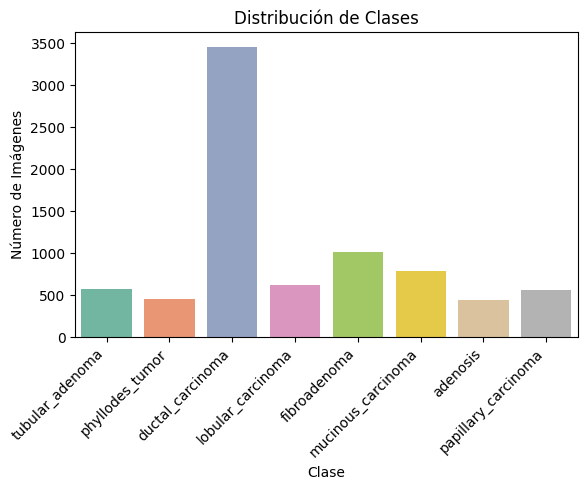

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una paleta automática según el número de clases únicas
clases_unicas = df['clase_name'].unique()
paleta_colores = sns.color_palette("Set2", len(clases_unicas))
custom_palette = dict(zip(clases_unicas, paleta_colores))

# Graficar la distribución de clases
plt.figure(figsize=(6, 5))
sns.countplot(x='clase_name', data=df, palette=custom_palette)
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Número de Imágenes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-894609952.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_magnification, x='magnification', y='count', palette=custom_palette)


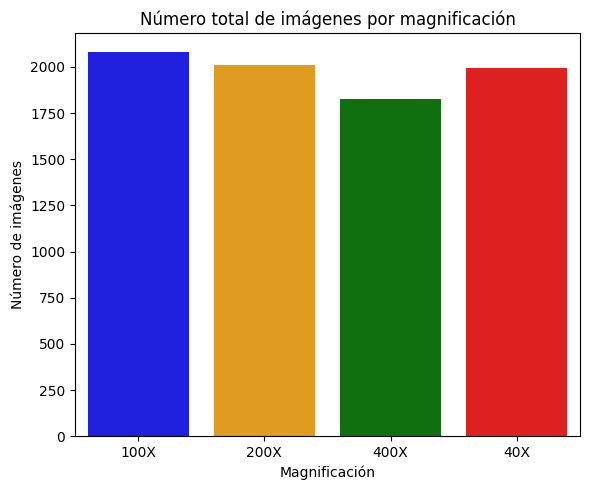

In [ ]:
import seaborn as sns

# Crear paleta personalizada para las magnificaciones
magnificaciones_unicas = info_df['magnification'].unique()
paleta_colores = ["red", "green", "orange", "blue"]
custom_palette = dict(zip(magnificaciones_unicas, paleta_colores))

# Conteo total por magnificación
counts_by_magnification = info_df['magnification'].value_counts().sort_index()

# Convertir a DataFrame para seaborn
df_magnification = counts_by_magnification.reset_index()
df_magnification.columns = ['magnification', 'count']

# Gráfico usando seaborn con paleta personalizada
plt.figure(figsize=(6,5))
sns.barplot(data=df_magnification, x='magnification', y='count', palette=custom_palette)
plt.title("Número total de imágenes por magnificación")
plt.ylabel("Número de imágenes")
plt.xlabel("Magnificación")
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

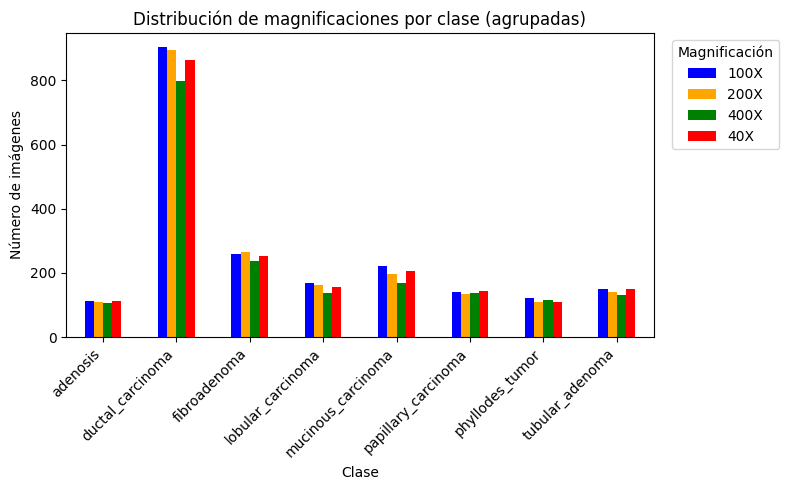

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear paleta personalizada para las magnificaciones
magnificaciones_unicas = info_df['magnification'].unique()
paleta_colores = ["red", "green", "orange", "blue"]
custom_palette = dict(zip(magnificaciones_unicas, paleta_colores))

# Conteo total por magnificación
counts_by_class = pd.crosstab(info_df['clase_name'], info_df['magnification'])

# Gráfico de barras agrupadas por clase
plt.figure(figsize=(8, 5))
counts_by_class.plot(
    kind="bar",
    stacked=False,  # <- barras agrupadas, no apiladas
    color=[custom_palette[m] for m in counts_by_class.columns],
    figsize=(8, 5)
)
plt.title("Distribución de magnificaciones por clase (agrupadas)")
plt.ylabel("Número de imágenes")
plt.xlabel("Clase")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Magnificación", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


<Figure size 600x500 with 0 Axes>

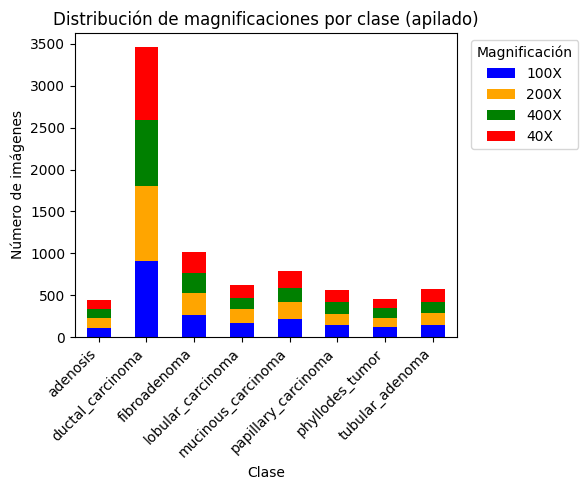

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear paleta personalizada para las magnificaciones
magnificaciones_unicas = info_df['magnification'].unique()
paleta_colores = ["red", "green", "orange", "blue"]
custom_palette = dict(zip(magnificaciones_unicas, paleta_colores))

# Conteo total por magnificación
counts_by_class = pd.crosstab(info_df['clase_name'], info_df['magnification'])

# Gráfico de barras apiladas por clase
plt.figure(figsize=(6, 5))
counts_by_class.plot(kind="bar", stacked=True, color=custom_palette, figsize=(6,5))
plt.title("Distribución de magnificaciones por clase (apilado)")
plt.ylabel("Número de imágenes")
plt.xlabel("Clase")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Magnificación", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


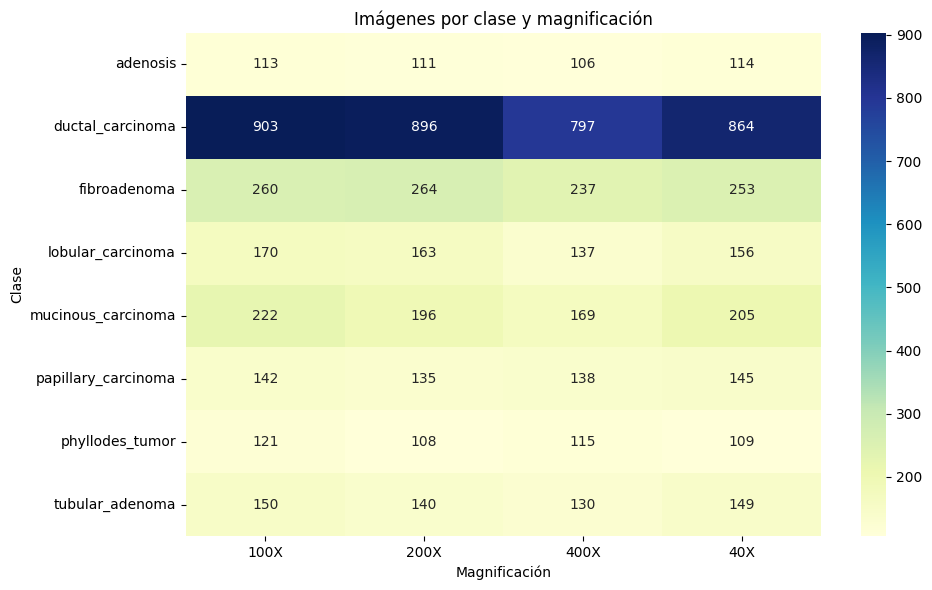

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

counts_by_class = pd.crosstab(info_df['clase_name'], info_df['magnification'])

# Heatmap de conteos
plt.figure(figsize=(10, 6))
sns.heatmap(counts_by_class, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Imágenes por clase y magnificación")
plt.ylabel("Clase")
plt.xlabel("Magnificación")
plt.tight_layout()
plt.show()
